In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA_DPA/911_metadata.csv")

In [ ]:
df.isna().sum()

id                  0
event_id            0
link                0
title               0
date               21
state               8
deaths              1
potential_death     1
false_alarm         1
description         9
deaths_binary       0
break               0
filename            0
dtype: int64

In [ ]:
columns=['state','potential_death','false_alarm','title']

In [ ]:
df=df[columns]

In [ ]:
df.isna().sum()

state              8
potential_death    1
false_alarm        1
title              0
dtype: int64

In [ ]:
import re

def label_title(row):
    # Define a list of keywords and their variations
    keywords = ['accident', 'prank', 'fake', 'date', 'Non-emerg']

    # Create a regex pattern to match any form of the keywords
    pattern = r'\b(?:' + '|'.join(re.escape(word) for word in keywords) + r')\b'

    # Check if the title contains the pattern or if false_alarm is 1
    if re.search(pattern, row.title, flags=re.IGNORECASE) or row.false_alarm == 1:
        return 'prank'
    return 'genuine'

# Apply the label_title function to create a new 'label' column
df['label'] = df.apply(label_title, axis=1)

df.isna().sum() #state, false_alarm and potential_death columns had NaN values
majority_state = df['state'].mode()[0]
df['state'].fillna(majority_state, inplace=True)
df['false_alarm'] = df.apply(lambda row: 1 if row['label'] == 'prank' else 0 if row['label'] == 'genuine' else row['false_alarm'], axis=1)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Define the column to be imputed
impute_column = ["potential_death"]

# Fit and transform the imputer on the specified column
df[impute_column] = imputer.fit_transform(df[impute_column])

In [ ]:
df.isna().sum()

state              0
potential_death    0
false_alarm        0
title              0
label              0
dtype: int64

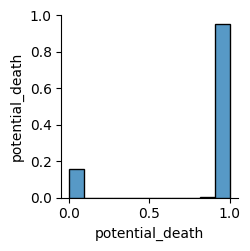

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your dataset
# Replace 'df' with your actual DataFrame

# Select the columns you want to include in the pair plot
columns_to_include = ["potential_death", "state"]

# Create the pair plot
sns.pairplot(df[columns_to_include])

# Display the plot
plt.show()


In [ ]:
df['potential_death'].unique()

array([1.        , 0.        , 0.85895628])

In [ ]:
import numpy as np

In [ ]:
df['potential_death'] = np.where(df['potential_death'] > 0, 1, 0)

In [ ]:
df['potential_death'].unique()

array([1, 0])

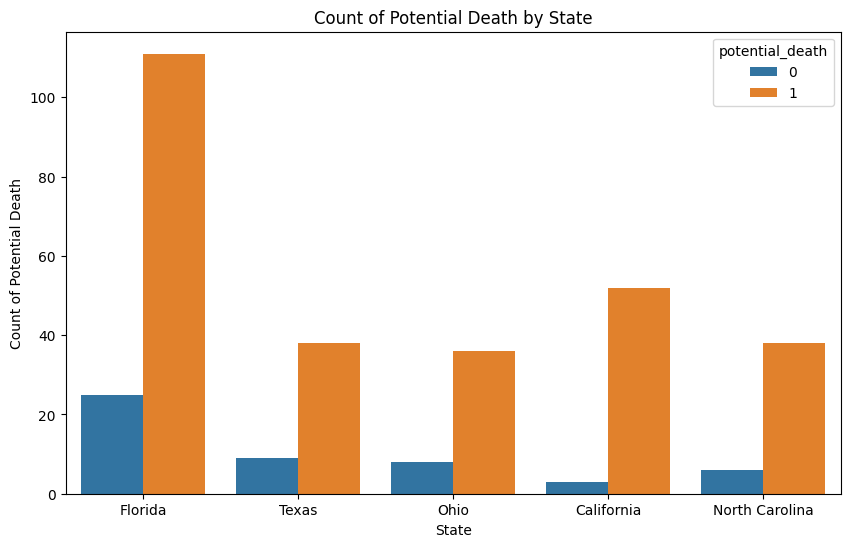

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Find the top 5 states based on the frequency of potential_death
top_states = df['state'].value_counts().head(5).index.tolist()

# Filter the DataFrame to include only the top 5 states
filtered_df = df[df['state'].isin(top_states)]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=filtered_df, x='state', hue='potential_death')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Count of Potential Death')
plt.title('Count of Potential Death by State')

# Display the plot
plt.show()


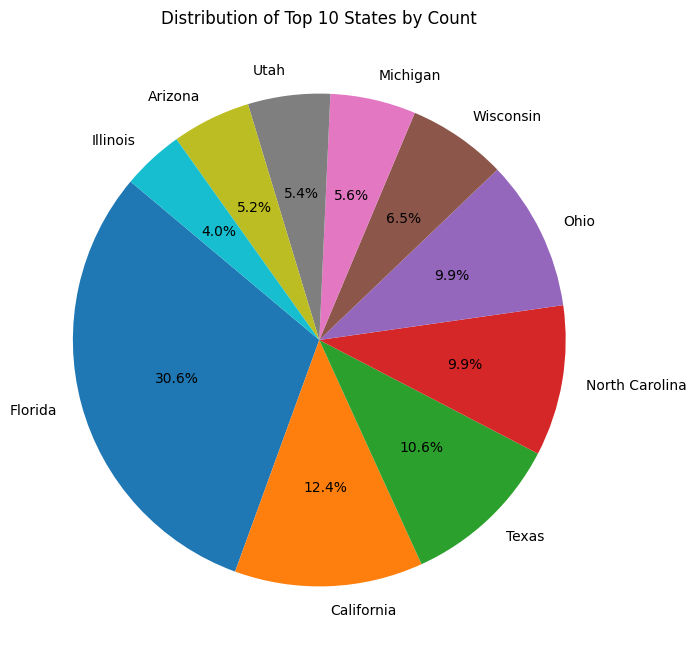

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Find the top 15 states based on the frequency of occurrence
top_states = df['state'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Top 10 States by Count')

# Display the pie chart
plt.show()
